<a href="https://colab.research.google.com/github/waquasadnankarimi/Function/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import zipfile
import pandas as pd

with zipfile.ZipFile('/content/dataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

df = pd.read_csv('/content/dataset.csv.zip')
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [4]:
df = df.dropna()


In [6]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['crypto_name', 'date'])

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['open','high','low','close','volume','marketCap']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [9]:
df['volatility'] = (df['high'] - df['low']) / df['close']


In [11]:
df['rolling_vol_7'] = df.groupby('crypto_name')['volatility'].rolling(7).mean().reset_index(0,drop=True)
df['rolling_vol_14'] = df.groupby('crypto_name')['volatility'].rolling(14).mean().reset_index(0,drop=True)

In [13]:
df['liquidity_ratio'] = df['volume'] / df['marketCap']

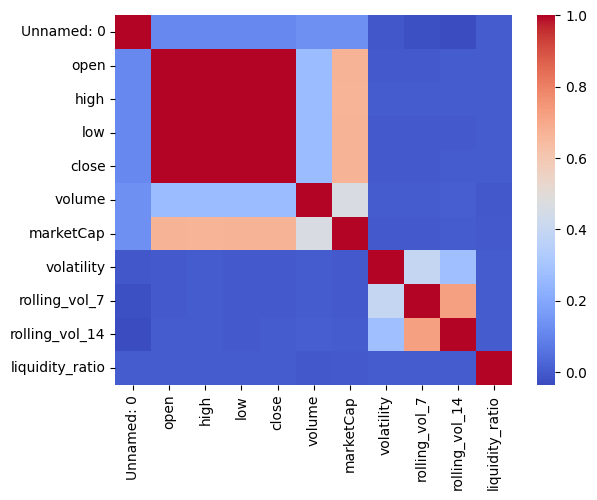

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.show()

<Axes: title={'center': 'Bitcoin Volatility Trend'}>

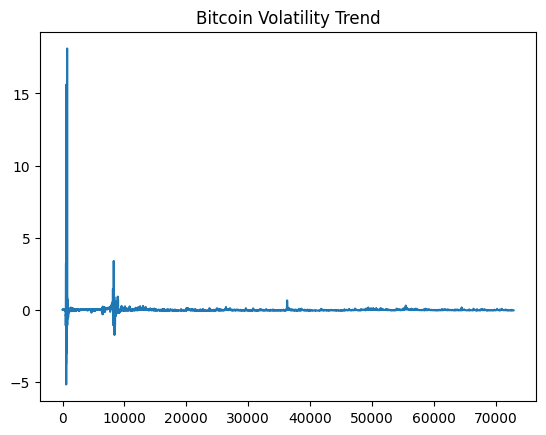

In [17]:
df[df['crypto_name']=='Bitcoin']['volatility'].plot(title="Bitcoin Volatility Trend")

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df['ma_7'] = df.groupby('crypto_name')['close'].rolling(7).mean().reset_index(0,drop=True)
df['ma_14'] = df.groupby('crypto_name')['close'].rolling(14).mean().reset_index(0,drop=True)
df = df.dropna()

X = df[['rolling_vol_7','rolling_vol_14','liquidity_ratio','ma_7','ma_14']]
y = df['volatility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=200, max_depth=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2:", r2_score(y_test, pred))


MAE: 0.003317560632341174
RMSE: 0.03389098398513169
R2: 0.09697523569569322


In [22]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

joblib.dump(model, 'models/volatility_model.pkl')

['models/volatility_model.pkl']

In [24]:
!pip install streamlit
import streamlit as st
import joblib
import pandas as pd

model = joblib.load('models/volatility_model.pkl')

st.title("Crypto Volatility Predictor")

input_data = st.number_input("Rolling Volatility (7 days)")
liquidity = st.number_input("Liquidity Ratio")

prediction = model.predict([[input_data, input_data, liquidity, input_data, input_data]])

st.write("Predicted Volatility:", prediction[0])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


2026-02-09 15:41:59.311 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 15:41:59.450 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-09 15:41:59.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 15:41:59.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 15:41:59.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 15:41:59.457 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 15:41:59.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 15:41:59.462 Thread 'MainThread': mi